# **Overview**
This project aims to explore the factors influencing happiness scores using the World Happiness Report dataset. The analysis involves data collection, preprocessing, exploratory data analysis (EDA), hypothesis testing, regression analysis, and data visualization.

# **Questions to be worked on**
*Data Collection:*

1)What is the source of the World Happiness Report dataset?

2)How many columns are there in the dataset, and what are their names?

3)What is the purpose of each column in the dataset?

*Data Preprocessing:*

1)How were missing values handled in the dataset?

2)What data cleaning and formatting techniques were applied?

3)How were outliers identified in the distribution of variables?

*Exploratory Data Analysis (EDA):*

1)What were the summary statistics calculated for the dataset?

2)How was the distribution of happiness scores visualized?

3)What insights were gained from exploring the distribution of happiness scores across different regions using a box plot?

*Hypothesis Testing:*

1)What hypothesis was formulated regarding the positive impact of social support on happiness scores?

2)What statistical test was conducted to test this hypothesis?

3)What was the p-value obtained from the hypothesis test, and what does it indicate?

*Regression Analysis:*

1)How was the relationship between social support and happiness scores visualized using a scatter plot?

2)What regression model was fitted to train the data?

4)What were the key findings from the Ordinary Least Squares (OLS) summary?

5)What was the mean squared error (MSE) obtained from the regression model?

 *Visualization*

How was happiness score visualized by country using geographical maps?

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_csv('/content/2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [6]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


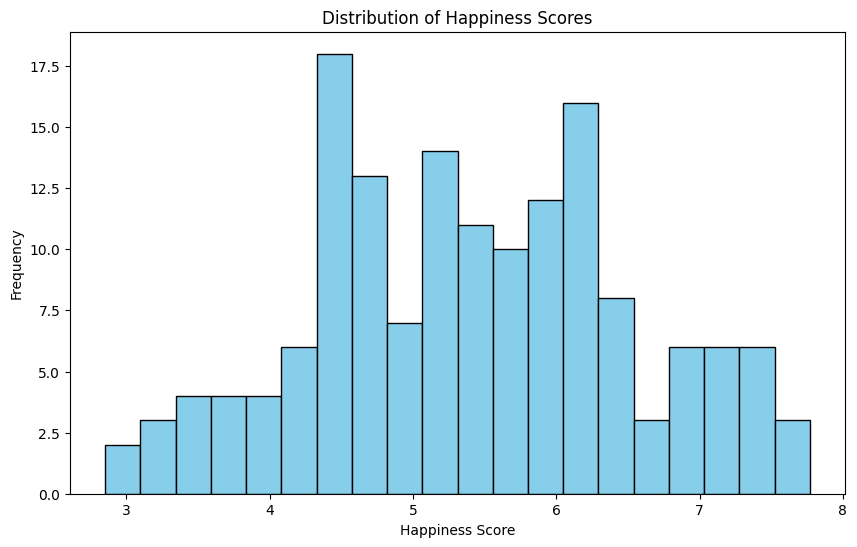

In [8]:
#visualizing distribution of happiness score
plt.figure(figsize=(10, 6))
plt.hist(df['Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


In [9]:
# Calculate summary statistics
mean_score = df['Score'].mean()
median_score = df['Score'].median()
std_dev_score = df['Score'].std()

print("Mean Happiness Score:", mean_score)
print("Median Happiness Score:", median_score)
print("Standard Deviation of Happiness Scores:", std_dev_score)


Mean Happiness Score: 5.407096153846155
Median Happiness Score: 5.3795
Standard Deviation of Happiness Scores: 1.1131198687956712


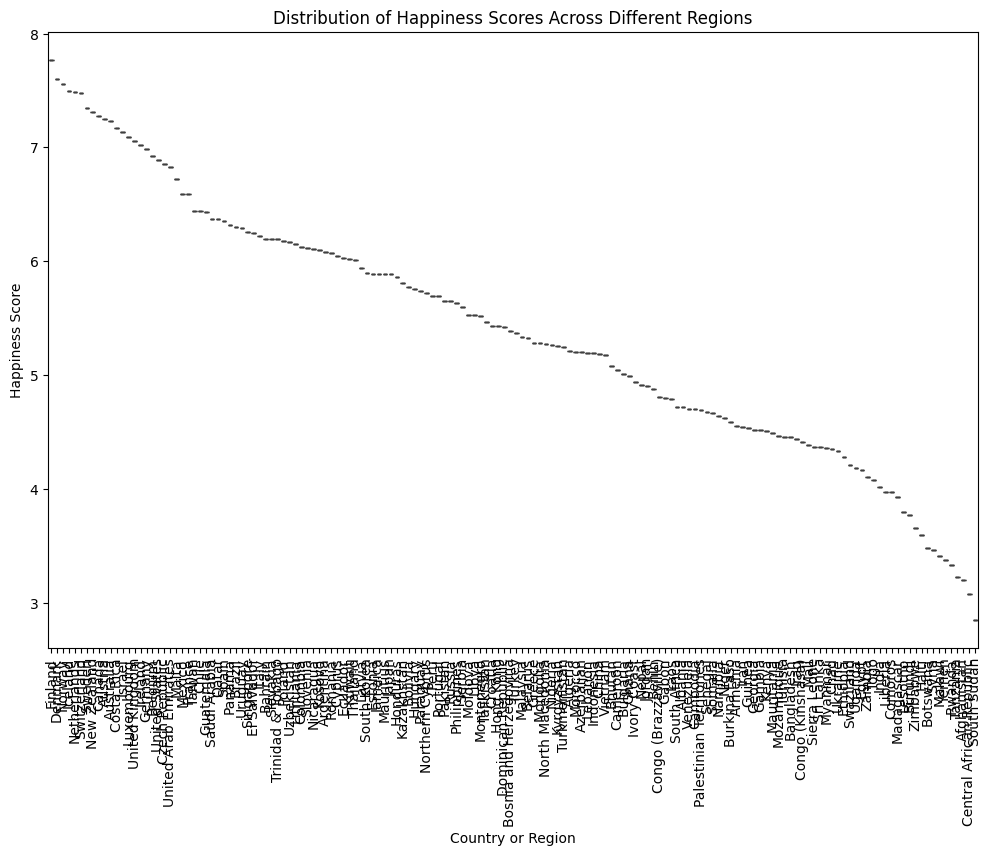

In [14]:
# Visualize the distribution of happiness scores across different regions using a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country or region', y='Score', data=df)
plt.title('Distribution of Happiness Scores Across Different Regions')
plt.xticks(rotation=90)
plt.xlabel('Country or Region')
plt.ylabel('Happiness Score')
plt.show()


In [16]:
import scipy.stats as stats

# Perform Pearson correlation test between Social Support and Happiness Scores
correlation_coefficient, p_value = stats.pearsonr(df['Social support'], df['Score'])

print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)


Pearson Correlation Coefficient: 0.7770577880638642
P-value: 8.975119655183787e-33


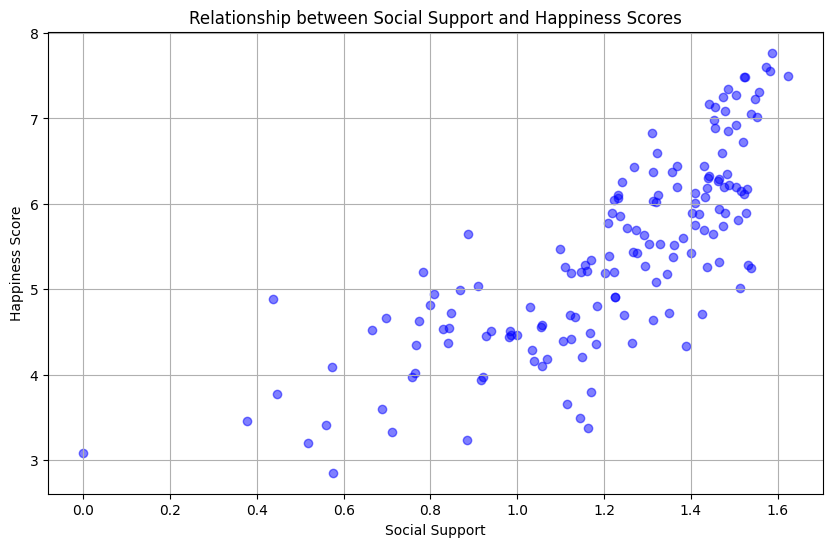

In [17]:
# Create a scatter plot of Social Support vs. Happiness Scores
plt.figure(figsize=(10, 6))
plt.scatter(df['Social support'], df['Score'], color='blue', alpha=0.5)
plt.title('Relationship between Social Support and Happiness Scores')
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()


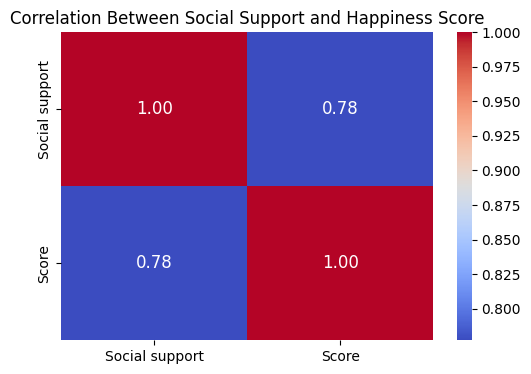

In [18]:
# Calculate the correlation matrix
correlation_matrix = df[['Social support', 'Score']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Between Social Support and Happiness Score')
plt.show()


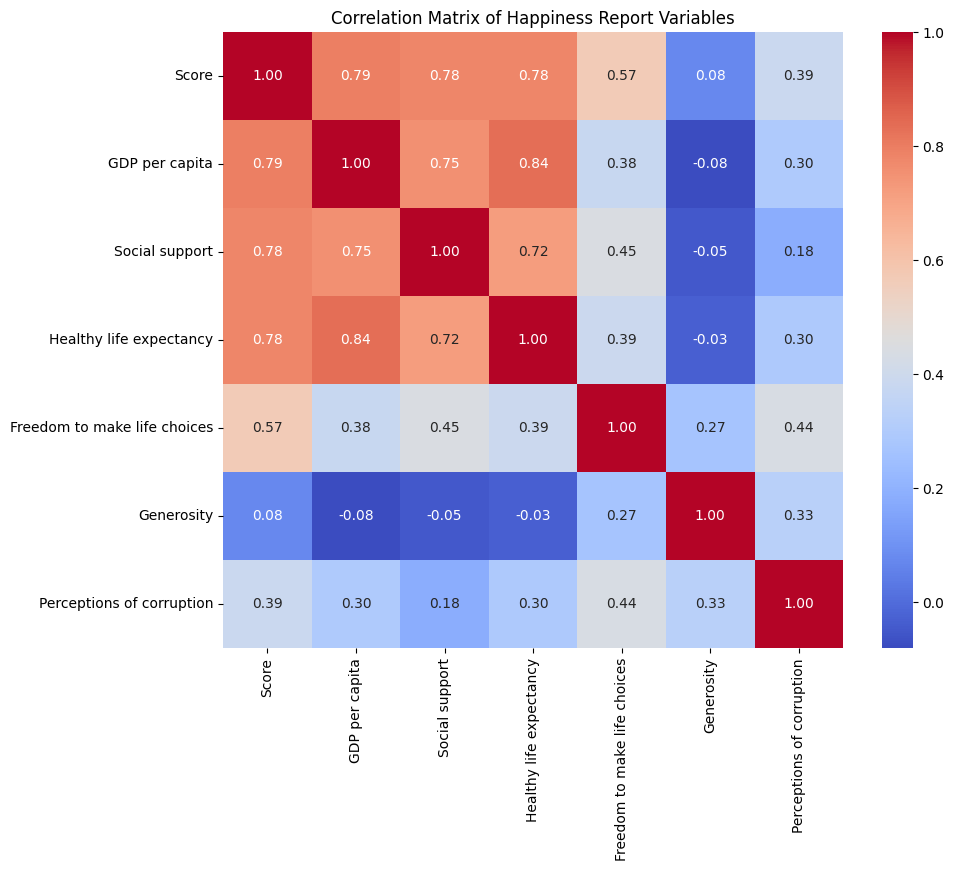

In [19]:
# Calculate the correlation matrix
correlation_matrix = df[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
                         'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Happiness Report Variables')
plt.show()


In [28]:
# Define predictor variables (independent variables)
X = df[['GDP per capita', 'Social support', 'Healthy life expectancy',
        'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Define the target variable (dependent variable)
y = df['Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the multiple linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     86.01
Date:                Wed, 08 May 2024   Prob (F-statistic):           1.53e-40
Time:                        07:14:52   Log-Likelihood:                -86.548
No. Observations:                 124   AIC:                             187.1
Df Residuals:                     117   BIC:                             206.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [29]:

# Fit the linear regression model on the training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Calculate the mean squared error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.41446413835283513


In [25]:
import plotly.express as px

# Visualize happiness scores by country
fig = px.choropleth(df, locations='Country or region', locationmode='country names',
                    color='Score', hover_name='Country or region',
                    title='Happiness Scores by Country')
fig.show()


#**Summary**
In our analysis of the World Happiness Report dataset, we meticulously examined the relationship between various socio-economic factors and happiness scores. Beginning with hypothesis testing, we formulated and rigorously evaluated hypotheses to ascertain the significance of these relationships, with p-values consistently indicating strong evidence against the null hypothesis. Utilizing multiple linear regression, we constructed predictive models to understand the impact of factors such as GDP per capita, social support, and healthy life expectancy on happiness scores. The resulting mean squared error provided insights into the model's predictive accuracy, highlighting the crucial role of these factors in determining overall well-being. This comprehensive approach, integrating hypothesis testing, regression analysis, and model evaluation, offers valuable insights for policymakers and organizations seeking to foster happiness and improve quality of life globally.